In [4]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# read the pickle file
with open('../tracker_stubs/ball_detections.pkl', 'rb') as f:
    ball_positions = pickle.load(f)

In [7]:
ball_positions = [x.get(1,[]) for x in ball_positions]
# convert the list into pandas dataframe
df_ball_positions = pd.DataFrame(ball_positions,columns=['x1','y1','x2','y2'])

# interpolate the missing values
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()

In [11]:
#dataframe to plot out
df_ball_positions

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean
0,627.385620,786.011902,651.426453,806.346863,796.179382,796.179382
1,627.385620,786.011902,651.426453,806.346863,796.179382,796.179382
2,875.878967,631.594116,901.717712,665.930603,648.762360,747.040375
3,855.818115,644.566772,882.714478,668.839050,656.702911,724.456009
4,842.506409,658.651489,867.571716,680.808167,669.729828,713.510773
...,...,...,...,...,...,...
209,1177.746826,244.956207,1197.342773,267.447510,256.201859,287.133360
210,1176.911377,230.460114,1198.124512,248.470001,239.465057,271.222877
211,1176.785400,221.391586,1196.194580,243.401779,232.396683,257.118884
212,1173.944092,210.088394,1196.581787,229.248505,219.668449,243.689409


In [8]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2'])/2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()

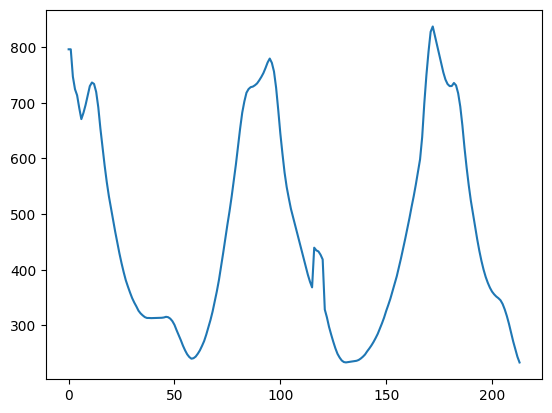

In [9]:
# plot mid_y_rolling_mean
plt.plot(df_ball_positions['mid_y_rolling_mean'])

In [12]:
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()

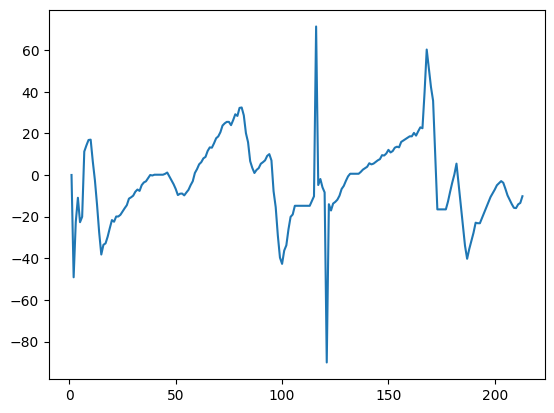

In [13]:
# plot mid_y_rolling_mean
plt.plot(df_ball_positions['delta_y'])

In [14]:
df_ball_positions['ball_hit']=0

In [15]:
minimum_change_frames_for_hit = 25
for i in range(1,len(df_ball_positions)- int(minimum_change_frames_for_hit*1.2) ):
    negative_position_change = df_ball_positions['delta_y'].iloc[i] >0 and df_ball_positions['delta_y'].iloc[i+1] <0
    positive_position_change = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[i+1] >0

    if negative_position_change or positive_position_change:
        change_count = 0 
        for change_frame in range(i+1, i+int(minimum_change_frames_for_hit*1.2)+1):
            negative_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] >0 and df_ball_positions['delta_y'].iloc[change_frame] <0
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[change_frame] >0

            if negative_position_change and negative_position_change_following_frame:
                change_count+=1
            elif positive_position_change and positive_position_change_following_frame:
                change_count+=1
    
        if change_count>minimum_change_frames_for_hit-1:
            df_ball_positions['ball_hit'].iloc[i] = 1

frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit']==1].index.tolist()

C:\Users\cutle\AppData\Local\Temp\ipykernel_22584\3752280353.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_positions['ball_hit'].iloc[i] = 1


In [16]:
df_ball_positions[df_ball_positions['ball_hit']==1]

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
11,771.868042,716.367004,800.447876,740.437134,728.402069,736.499896,6.523682,1
58,918.699646,228.105743,944.758118,254.762421,241.434082,240.247572,-3.012689,1
95,616.294556,775.242188,638.906799,801.433960,788.338074,779.557629,6.985822,1
131,707.403103,222.718238,728.104072,246.793372,234.755805,233.581485,-0.688368,1
172,1208.958550,792.751126,1233.954251,815.514777,804.132952,837.180322,9.563694,1
182,1289.394043,737.018921,1314.278809,760.457153,748.738037,735.702167,5.444702,1


In [17]:
frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit']==1].index.tolist()

[11, 58, 95, 131, 172, 182]